In [250]:
#Libraries Import
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
#Portfolio Assets Info
portfolio_value = 1000000
ticker = 'AAPL','NVDA','MSFT'
startDate = '2024-01-01'
endDate = dt.datetime.now()
df1 = yf.download(ticker, startDate, endDate) ['Close']
weights = np.array([0.4,0.3,0.3])

[*********************100%***********************]  3 of 3 completed


In [299]:
#Mean, Standard Deviation and Covariance Calc
dailych = np.log(df1/df1.shift(1)).dropna()
portfolio_returns = dailych @ weights  # Daily weighted returns
std = dailych.std() #Volatility 1-day
cov = dailych.cov() #Covariance Matrix
portfolio_return_mean = np.mean(portfolio_returns) #Daily Mean Adjusted for Weights
portfolio_vol = np.std(portfolio_returns) #Daily Standard Deviation Adjusted for Weights
print(f'The daily mean return for this portfolio is {portfolio_return_mean*100: .3f}% and daily volatility is {portfolio_vol*100: .3f}%.')

The daily mean return for this portfolio is  0.106% and daily volatility is  1.880%.


In [309]:
#VaR Settings
time_period = 10 # in days
cl = 0.95 # Pct as a decimal
z_score = stats.norm.ppf(cl)
time_adjusted_vol = portfolio_vol*np.sqrt(time_period)
VaR = portfolio_value * time_adjusted_vol * z_score
print(f'The {cl*100}% {time_period}-Day Value at Risk for Portfolio Consisting from {ticker} is {VaR: .2f} Currency Units.')

The 95.0% 10-Day Value at Risk for Portfolio Consisting from ('AAPL', 'NVDA', 'MSFT') is  97791.95 Currency Units.


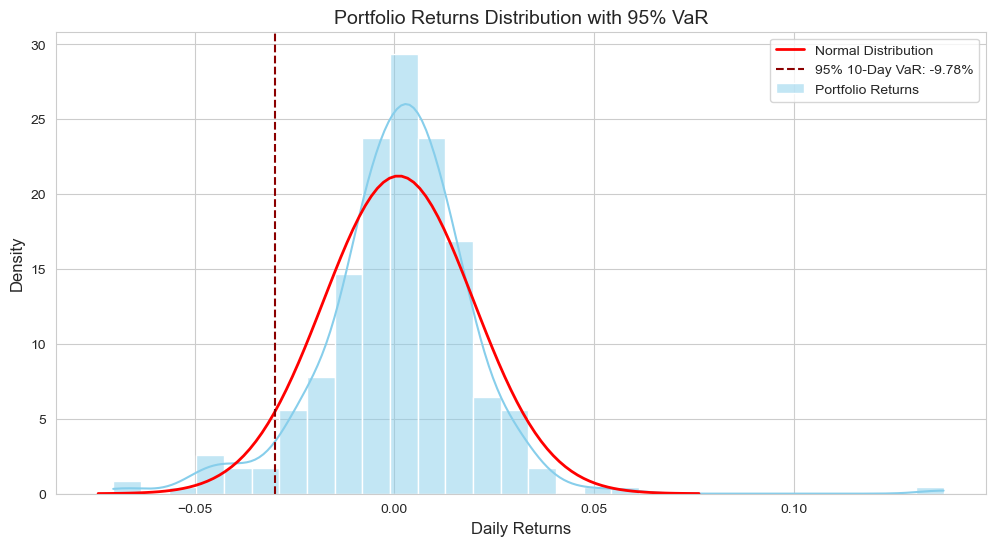

In [313]:
#Model Visualization
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# 1. Histogram of Portfolio Returns
sns.histplot(portfolio_returns, kde=True, color="skyblue", bins=30, stat="density", label="Portfolio Returns")

# 2. Overlay Normal Distribution (for reference)
x = np.linspace(mean_return - 4*volatility, mean_return + 4*volatility, 100)
plt.plot(x, stats.norm.pdf(x, mean_return, volatility), 'r-', lw=2, label="Normal Distribution")

# 3. Mark VaR Cutoff (Left Tail)
plt.axvline(x=mean_return - z_score * volatility, color="darkred", linestyle="--", 
            label=f"{cl*100:.0f}% {time_period}-Day VaR: {-VaR/portfolio_value*100:.2f}%")

# 4. Labels and Legend
plt.title(f"Portfolio Returns Distribution with {cl*100:.0f}% VaR", fontsize=14)
plt.xlabel("Daily Returns", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.show()